In [22]:
# Importing necessary libraries
import pandas as pd
from textblob import TextBlob
import re
import string
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the CSV file into a pandas DataFrame
file_path = "D:\\sentiment_analysis\\Corona.csv"  
data = pd.read_csv(file_path, encoding='latin1') 

# EDA

In [23]:
# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative  


In [24]:
# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(data.describe())


Summary statistics of numerical columns:
           UserName    ScreenName
count  41157.000000  41157.000000
mean   24377.000000  69329.000000
std    11881.146851  11881.146851
min     3799.000000  48751.000000
25%    14088.000000  59040.000000
50%    24377.000000  69329.000000
75%    34666.000000  79618.000000
max    44955.000000  89907.000000


In [25]:
# Information about columns and data types
print("\nInformation about columns and data types:")
print(data.info())



Information about columns and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB
None


In [26]:
# Checking for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())



Missing values in the dataset:
UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64


In [28]:
# Displaying value counts before filling missing values
print("Value counts before filling missing values:")
print(data['Location'].value_counts())


Value counts before filling missing values:
London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64


In [29]:
# Filling missing 'Location' values with forward fill
data['Location'].fillna(method='ffill', inplace=True)

In [30]:
# Displaying value counts after filling missing values
print("\nValue counts after filling missing values:")
print(data['Location'].value_counts())


Value counts after filling missing values:
London                          680
London, England                 665
United States                   646
New York, NY                    479
Washington, DC                  463
                               ... 
Boston/Providence                 1
US Â EU Â Asia                  1
Benito JuÃ¡rez                    1
Arkansas's 3rd District           1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64


In [55]:
# Clean text data
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = text.lower()  # Convert to lowercase
    return text

In [56]:
# Applying cleaning function to 'OriginalTweet' column and create 'CleanTweet' column
data['CleanTweet'] = data['OriginalTweet'].apply(clean_text)

# VISUALIZATION

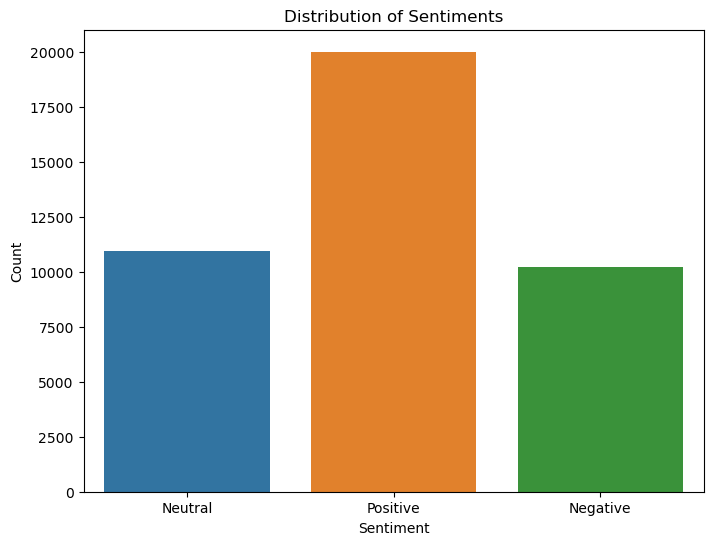

In [54]:
# Visualizing the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=data)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

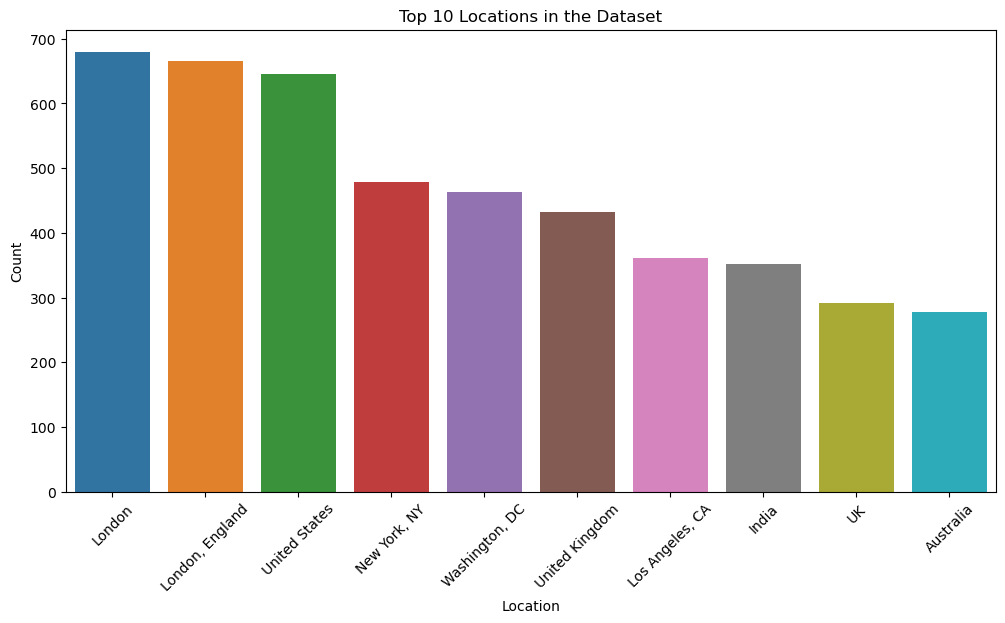

In [53]:
# Visualizing other columns as needed
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', data=data, order=data['Location'].value_counts().iloc[:10].index)
plt.title('Top 10 Locations in the Dataset')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

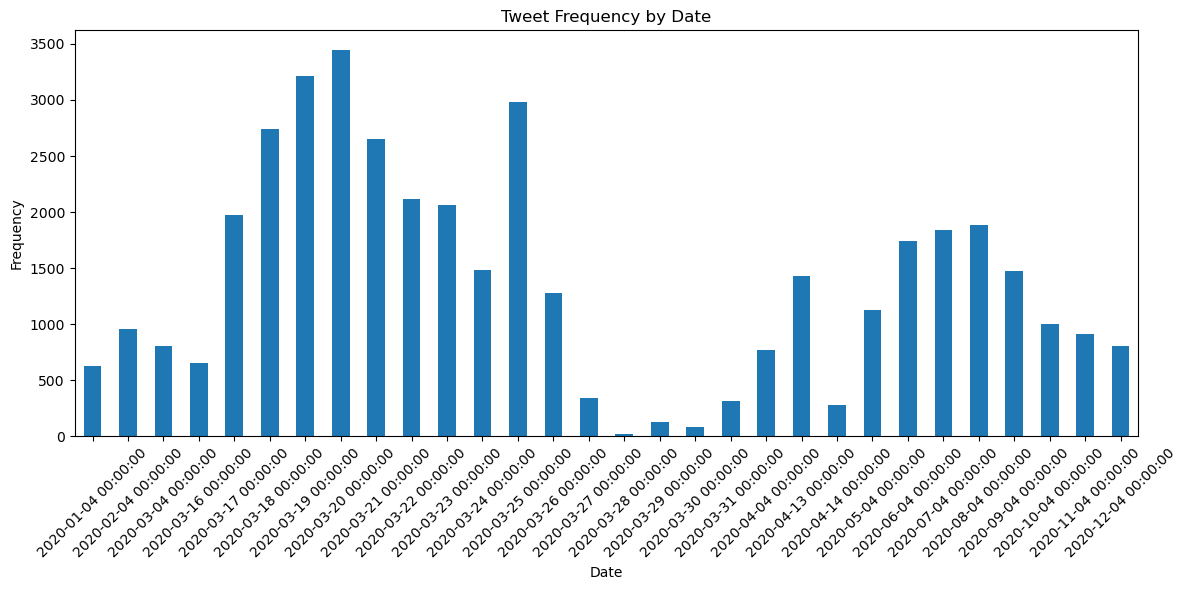

In [62]:
# Converting 'TweetAt' column to datetime format
data['TweetAt'] = pd.to_datetime(data['TweetAt'])
data['TweetAt'] = pd.to_datetime(data['TweetAt'], format='%d-%m-%Y')


# Extract date frequencies
date_freq = data['TweetAt'].value_counts().sort_index()

# Plotting the tweet frequencies by date
plt.figure(figsize=(12, 6))
date_freq.plot(kind='bar')
plt.title('Tweet Frequency by Date')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANUP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


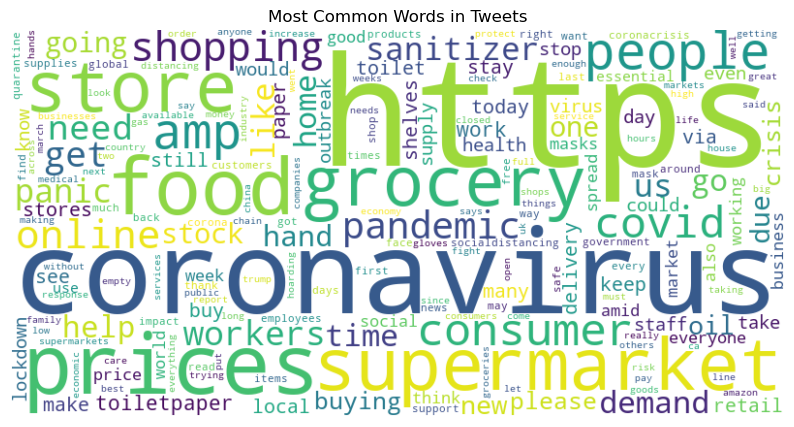

In [64]:
#Importing necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


# Combining all tweets into a single string
all_tweets = ' '.join(data['OriginalTweet'].values.tolist())

# Tokenize words and filter out stopwords
stop_words = set(stopwords.words('english'))  # Stopwords
words = nltk.word_tokenize(all_tweets.lower())  # Tokenization and lowercase conversion
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Calculating word frequencies
word_freq = Counter(filtered_words)

# Creating a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Tweets')
plt.show()


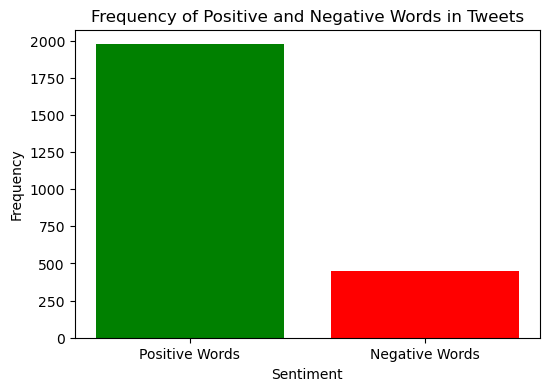

In [65]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


# Sample lists of positive and negative words
positive_words = ['good', 'happy', 'great', 'positive', 'excellent']
negative_words = ['bad', 'sad', 'terrible', 'negative', 'awful']

# Combine all tweets into a single string
all_tweets = ' '.join(data['OriginalTweet'].values.tolist())

# Tokenize words
words = all_tweets.lower().split()

# Count positive and negative word occurrences
positive_word_count = sum(word in positive_words for word in words)
negative_word_count = sum(word in negative_words for word in words)

# Plotting the frequencies of positive and negative words
labels = ['Positive Words', 'Negative Words']
values = [positive_word_count, negative_word_count]

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['green', 'red'])
plt.title('Frequency of Positive and Negative Words in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


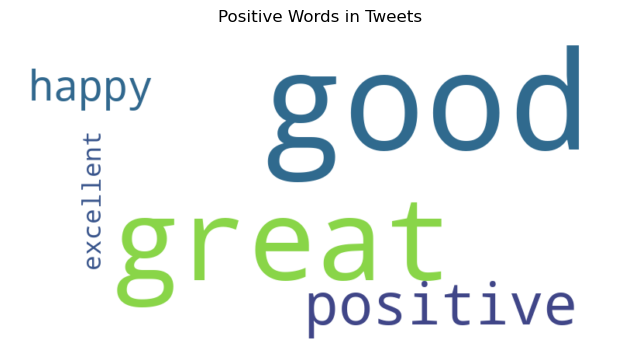

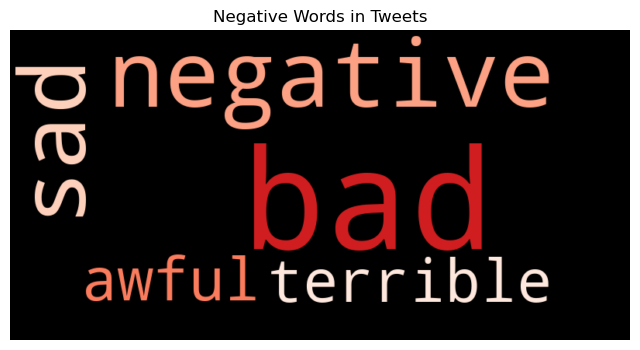

In [66]:
#importing necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Sample lists of positive and negative words 
positive_words = ['good', 'happy', 'great', 'positive', 'excellent']
negative_words = ['bad', 'sad', 'terrible', 'negative', 'awful']

# Combine all tweets into a single string
all_tweets = ' '.join(data['OriginalTweet'].values.tolist())

# Tokenize words
words = all_tweets.lower().split()

# Filter positive and negative words
positive_filtered = [word for word in words if word in positive_words]
negative_filtered = [word for word in words if word in negative_words]

# Count positive and negative word frequencies
positive_word_freq = Counter(positive_filtered)
negative_word_freq = Counter(negative_filtered)

# Generate word clouds for positive and negative words
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_word_freq)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate_from_frequencies(negative_word_freq)

# Plotting positive word cloud
plt.figure(figsize=(8, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Words in Tweets')
plt.axis('off')
plt.show()

# Plotting negative word cloud
plt.figure(figsize=(8, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Words in Tweets')
plt.axis('off')
plt.show()


In [67]:
#importing libraries for Deep learning model
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

In [69]:
# Preprocessing
max_words = 10000  # Maximum number of words to consider in the tokenizer
maxlen = 100  # Maximum length of a tweet

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['OriginalTweet'])

sequences = tokenizer.texts_to_sequences(data['OriginalTweet'])
X = pad_sequences(sequences, maxlen=maxlen)
y = np.array(data['Sentiment'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2}))


In [70]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Building the model
embedding_dim = 100
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))  # Adjust based on the number of sentiment classes

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [72]:
# Training the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
926/926 [==============================] - 208s 220ms/step - loss: 0.6079 - accuracy: 0.7498 - val_loss: 0.3357 - val_accuracy: 0.8961
Epoch 2/5
926/926 [==============================] - 194s 209ms/step - loss: 0.2578 - accuracy: 0.9203 - val_loss: 0.2742 - val_accuracy: 0.9144
Epoch 3/5
926/926 [==============================] - 196s 211ms/step - loss: 0.1958 - accuracy: 0.9430 - val_loss: 0.2683 - val_accuracy: 0.9204
Epoch 4/5
926/926 [==============================] - 195s 211ms/step - loss: 0.1506 - accuracy: 0.9565 - val_loss: 0.3022 - val_accuracy: 0.9083
Epoch 5/5
926/926 [==============================] - 198s 214ms/step - loss: 0.1158 - accuracy: 0.9649 - val_loss: 0.2802 - val_accuracy: 0.9159


In [73]:
# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


258/258 [==============================] - 9s 35ms/step - loss: 0.2962 - accuracy: 0.9178
Test accuracy: 0.9177599549293518


In [75]:
# Sample future tweets (replace with your actual future tweet data)
future_tweets = [
    "Excited to share this good news!",
    "Feeling disappointed about the outcome.",
    "Neutral thoughts on the current situation.",
    # Add more future tweets as needed
]

In [76]:
# Convert future tweets to sequences
future_sequences = tokenizer.texts_to_sequences(future_tweets)
X_future = pad_sequences(future_sequences, maxlen=maxlen)


In [77]:
# Making predictions on future tweets
future_predictions = model.predict(X_future)

1/1 [==============================] - 1s 658ms/step


In [79]:
# Accessing the training history
history_dict = history.history

In [80]:
# Extracting metrics
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

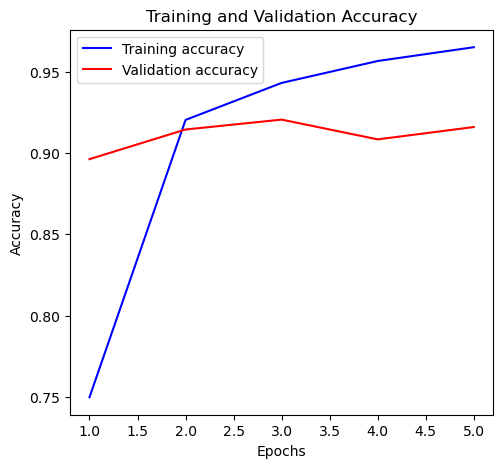

In [81]:
# Plotting training and validation accuracy
#The trend of training and validation accuracy over epochs is shown in Training and Validation Accuracy. 
#It is useful to determine whether the model is overfitting or underfitting, and whether it is successfully acquiring the patterns.
epochs = range(1, len(train_accuracy) + 1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

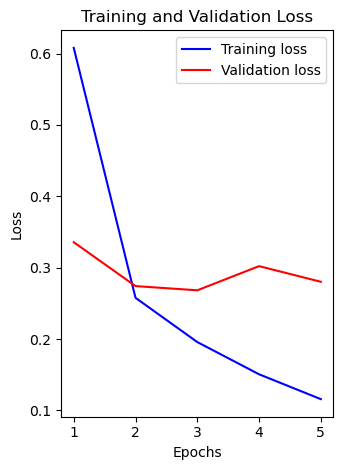

In [82]:
# Plotting training and validation loss
#The training and validation loss trend over epochs is displayed. 
#This aids in determining if the model is converging or overfitting.
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()